## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
 
#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_results

# Display the data table for preview
drug_grouped = combined_results.groupby(["Drug Regimen"])
drug_group_mean = round(drug_grouped["Tumor Volume (mm3)"].mean(),2)
drug_group_median = round(drug_grouped["Tumor Volume (mm3)"].median(),2)
drug_group_var = round(drug_grouped["Tumor Volume (mm3)"].var(),2)
drug_group_std = round(drug_grouped["Tumor Volume (mm3)"].std(),2)
drug_group_sem = round(drug_grouped["Tumor Volume (mm3)"].sem(),2)
summary_stats_df = pd.DataFrame({"Mean Volume":drug_group_mean,
                                 "Median Volume":drug_group_median,
                                 "Variance":drug_group_var,
                                 "Standard Deviation":drug_group_std,
                                 "Standard Error of Measurment":drug_group_sem})
summary_stats_df

,Mean Volume,Median Volume,Variance,Standard Deviation,Standard Error of Measurment
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [37]:
# Checking the number of mice.

mouse_metadata["Mouse ID"].count()

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

study_results['Mouse ID'].value_counts().head(25)


g989    13
b742    10
x822    10
e662    10
w914    10
l700    10
l509    10
r944    10
q787    10
e584    10
p438    10
t451    10
o331    10
l661    10
e227    10
m546    10
y769    10
e476    10
c282    10
c302    10
q511    10
g570    10
a203    10
s508    10
p136    10
Name: Mouse ID, dtype: int64

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 

study_results = study_results.set_index("Mouse ID")


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

study_results_droppedIndexData = study_results.loc['g989', :]
study_results_droppedIndexData.head(25)

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,
g989,0,45.000000,0
g989,0,45.000000,0
g989,5,48.786801,0
g989,5,47.570392,0
g989,10,51.745156,0
g989,10,49.880528,0
g989,15,51.325852,1
g989,15,53.442020,0
g989,20,55.326122,1


In [41]:
# Checking the number of mice in the clean DataFrame.

study_results = study_results.reset_index()
study_results['Mouse ID'].value_counts().head(25)

g989    13
b742    10
x822    10
e662    10
w914    10
l700    10
l509    10
r944    10
q787    10
e584    10
p438    10
t451    10
o331    10
l661    10
e227    10
m546    10
y769    10
e476    10
c282    10
c302    10
q511    10
g570    10
a203    10
s508    10
p136    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

combined_mice_study_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_mice_study_results.head(10)


mice_grouped = combined_mice_study_results.groupby("Drug Regimen")
mice_statistics_table = mice_grouped["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

mice_statistics_table = mice_statistics_table.rename(columns={"mean":"Mean",
                                                              "Median":"Median",
                                                              "var":"Variance",
                                                              "std" : "Standard Deviation",
                                                              "sem" : "SEM"})

mice_statistics_table


,Mean,median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# to get mice count for each timepoint grouped by drug

nameice_grouped_timepoint =mice_grouped["Timepoint"].value_counts() 


## Bar and Pie Charts

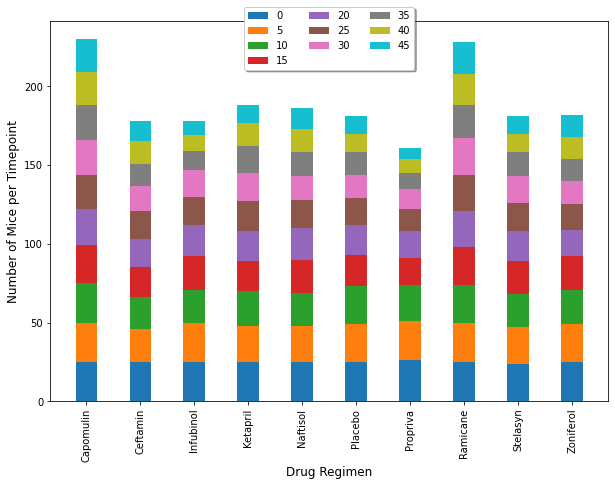

In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

Unique_drugRegimen_values = combined_mice_study_results["Drug Regimen"].unique() 
Unique_drugRegimen_values = sorted(Unique_drugRegimen_values)
Unique_Timepoint_values = combined_mice_study_results["Timepoint"].unique() 
mice_grouped_timepoint = combined_mice_study_results.groupby(["Timepoint"])

# to get mice count for each timepoint grouped by sorted drug name
mice_grouped_drug_regimen =mice_grouped_timepoint["Drug Regimen"].value_counts().sort_index().to_list()


counter = 0
combined_micecount_list = []
x_axis = np.arange(len(Unique_drugRegimen_values))

for i in range(len(Unique_drugRegimen_values)): 
    micecount_pertimepoint_list = []
    for j in range(len(Unique_Timepoint_values)): 
        
        micecount_pertimepoint_list.append(mice_grouped_drug_regimen[counter])
        counter = counter + 1
    
    combined_micecount_list.append(micecount_pertimepoint_list)

data = np.array(combined_micecount_list)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'] # colors to use for each timepoint bar 
fig = plt.gcf()
fig.set_size_inches(10, 7)
width = 0.4



X = np.arange(data.shape[1])
for i in range(data.shape[0]):  #loop for each timepoint to create stacked bar plot
  plt.bar(X, data[i],width, bottom = np.sum(data[:i], axis = 0), color = color_list[i % len(color_list)])

plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Mice per Timepoint', fontsize=12)
plt.xticks(X, Unique_drugRegimen_values,rotation=90)
plt.legend(Unique_Timepoint_values,loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.show()

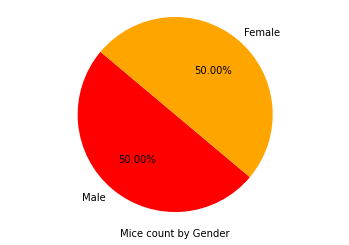

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

filtered = combined_mice_study_results.loc[(combined_mice_study_results["Timepoint"] == 0)] 
mice_grouped_sex_count = filtered["Sex"].value_counts() 

colors = ["red", "orange"]
mice_grouped_sex_count.plot(kind='pie', subplots=True, colors = colors, autopct="%.2f%%", startangle=140)
plt.axis('equal')
plt.xlabel("Mice count by Gender")
plt.ylabel("")
plt.show()

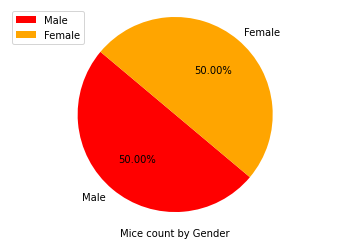

In [46]:
# Generate a pie plot showing the distribution of female versus male mice u

Unique_micesex_values = combined_mice_study_results["Sex"].unique()

labels = Unique_micesex_values
sizes = mice_grouped_sex_count
colors = ["red", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%.2f%%", startangle=140)
plt.axis("equal")
plt.xlabel("Mice count by Gender")
plt.ylabel("")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# get all rows of drug "Capomulin"
Capomulin_filtered_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Capomulin")]

# get sorted unique mouse id for drug capomulin
Capomulin_Micecount = Capomulin_filtered_df["Mouse ID"].unique()
Capomulin_Micecount = sorted(Capomulin_Micecount)

Capomulin_filtered_df = Capomulin_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

# group the rows of drug "Capomulin" by MouseID and then get last timepoint for each Mouse
Capomulin_filtered_df_grouped = Capomulin_filtered_df.groupby("Mouse ID")
TimepointMaxList = Capomulin_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Capomulin_tumorVol_list = []

# add the final tumor volumne of last timepoint for each mouse in a list

for x in range(len(Capomulin_Micecount)):
    Capomulin_Mice_df = Capomulin_filtered_df.loc[(Capomulin_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Capomulin_filtered_df["Mouse ID"] == Capomulin_Micecount[x])]
    tumorvolume = round(float(Capomulin_Mice_df["Tumor Volume (mm3)"]),2)
    Capomulin_tumorVol_list.append(tumorvolume)
Capomulin_tumorVol_list.sort()
Capomulin_tumorVol_df = pd.DataFrame(Capomulin_tumorVol_list, columns=['TumorVol'] )





# get all rows of drug "Ramicane"
Ramicane_filtered_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Ramicane")]

# get sorted unique mouse id for drug Ramicane
Ramicane_Micecount = Ramicane_filtered_df["Mouse ID"].unique()
Ramicane_Micecount = sorted(Ramicane_Micecount)

Ramicane_filtered_df = Ramicane_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

Ramicane_filtered_df_grouped = Ramicane_filtered_df.groupby("Mouse ID")
TimepointMaxList = Ramicane_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Ramicane_tumorVol_list = []

# add the final tumor volumne of last timepoint for each mouse in a list

for x in range(len(Ramicane_Micecount)):
    Ramicane_Mice_df = Ramicane_filtered_df.loc[(Ramicane_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Ramicane_filtered_df["Mouse ID"] == Ramicane_Micecount[x])]
    tumorvolume = round(float(Ramicane_Mice_df["Tumor Volume (mm3)"]),5)
    Ramicane_tumorVol_list.append(tumorvolume)
Ramicane_tumorVol_list.sort()
Ramicane_tumorVol_df = pd.DataFrame(Ramicane_tumorVol_list, columns=['TumorVol'] )




# get all rows of drug "Infubinol"
Infubinol_filtered_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Infubinol")]

# get sorted unique mouse id for drug Infubinol
Infubinol_Micecount = Infubinol_filtered_df["Mouse ID"].unique()
Infubinol_Micecount = sorted(Infubinol_Micecount)

Infubinol_filtered_df = Infubinol_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

Infubinol_filtered_df_grouped = Infubinol_filtered_df.groupby("Mouse ID")
TimepointMaxList = Infubinol_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Infubinol_tumorVol_list = []

# add the final tumor volumne of last timepoint for each mouse in a list

for x in range(len(Infubinol_Micecount)):
    Infubinol_Mice_df = Infubinol_filtered_df.loc[(Infubinol_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Infubinol_filtered_df["Mouse ID"] == Infubinol_Micecount[x])]
    tumorvolume = round(float(Infubinol_Mice_df["Tumor Volume (mm3)"]),5)
    Infubinol_tumorVol_list.append(tumorvolume)
Infubinol_tumorVol_list.sort()
Infubinol_tumorVol_df = pd.DataFrame(Infubinol_tumorVol_list, columns=['TumorVol'] )






# get all rows of drug "Ceftamin"
Ceftamin_filtered_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Ceftamin")]

# get sorted unique mouse id for drug Infubinol
Ceftamin_Micecount = Ceftamin_filtered_df["Mouse ID"].unique()
Ceftamin_Micecount = sorted(Ceftamin_Micecount)

Ceftamin_filtered_df = Ceftamin_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

Ceftamin_filtered_df_grouped = Ceftamin_filtered_df.groupby("Mouse ID")
TimepointMaxList = Ceftamin_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Ceftamin_tumorVol_list = []

for x in range(len(Ceftamin_Micecount)):
    Ceftamin_Mice_df = Ceftamin_filtered_df.loc[(Ceftamin_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Ceftamin_filtered_df["Mouse ID"] == Ceftamin_Micecount[x])]
    tumorvolume = round(float(Ceftamin_Mice_df["Tumor Volume (mm3)"]),5)
    Ceftamin_tumorVol_list.append(tumorvolume)
Ceftamin_tumorVol_list.sort()
Ceftamin_tumorVol_df = pd.DataFrame(Ceftamin_tumorVol_list, columns=['TumorVol'] )

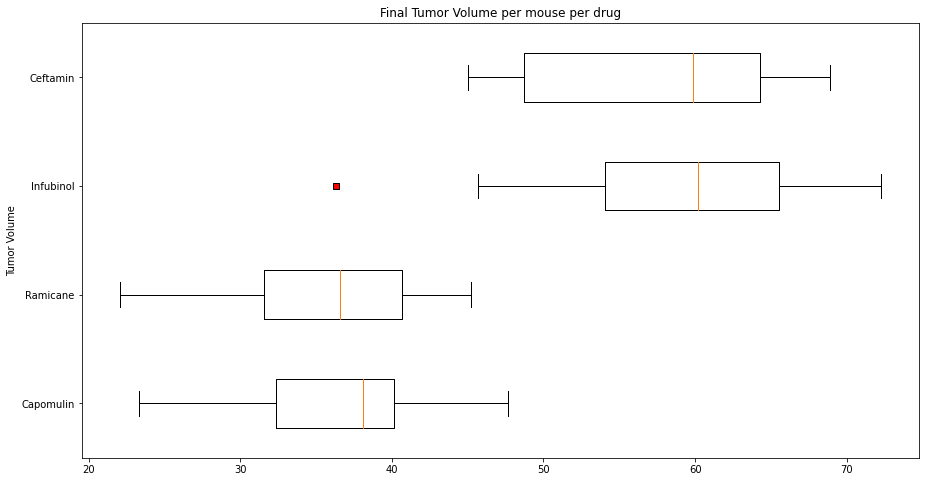

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [Capomulin_tumorVol_list, Ramicane_tumorVol_list, Infubinol_tumorVol_list, Ceftamin_tumorVol_list] #combine data of 4 drug regimens

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per mouse per drug')
ax1.set_ylabel('Tumor Volume')
red_square = dict(markerfacecolor='r', marker='s')
ax1.boxplot(data_to_plot, vert=False, flierprops=red_square)
plt.yticks([1, 2, 3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
fig1.set_size_inches(15, 8)
plt.show()

In [57]:
# Get unique mouse ID for drug "Capomulin"
Capomulin_uniqueMouseIds = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Capomulin")]["Mouse ID"].unique()

# Get rows for first mouse ID retruned for drug "Capomulin"
Filters_Drug_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Capomulin") & (combined_mice_study_results["Mouse ID"] == Capomulin_uniqueMouseIds[0])]

Filters_Drug_df = Filters_Drug_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
x_axis_data = np.arange(0,max(Filters_Drug_df["Timepoint"]) + 5,5)
points = Filters_Drug_df["Tumor Volume (mm3)"]

Filters_Drug_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
10,Capomulin,s185,0,45.000000
11,Capomulin,s185,5,43.878496
12,Capomulin,s185,10,37.614948
13,Capomulin,s185,15,38.177232
14,Capomulin,s185,20,36.866876
15,Capomulin,s185,25,33.949940
16,Capomulin,s185,30,32.959671
17,Capomulin,s185,35,28.328531
18,Capomulin,s185,40,25.472143
19,Capomulin,s185,45,23.343598


## Line and Scatter Plots

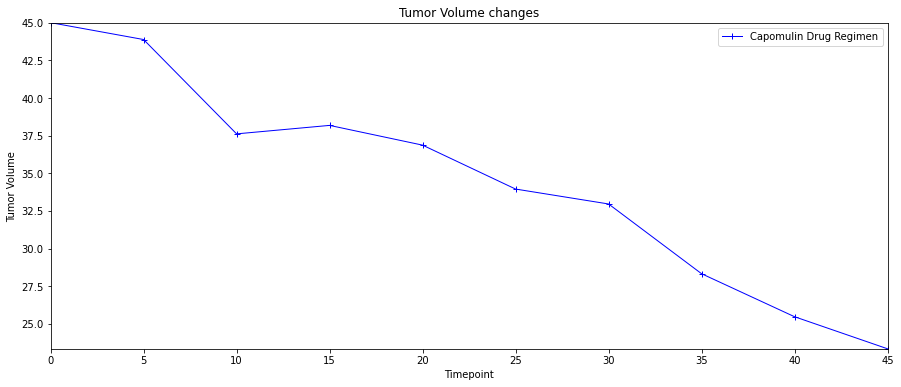

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(x_axis_data, points,marker="+",color="blue", linewidth=1, label='Capomulin Drug Regimen')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title("Tumor Volume changes")
plt.legend()
plt.xlim(0,max(Filters_Drug_df["Timepoint"]))
plt.ylim(min(Filters_Drug_df["Tumor Volume (mm3)"]),max(Filters_Drug_df["Tumor Volume (mm3)"]))
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()


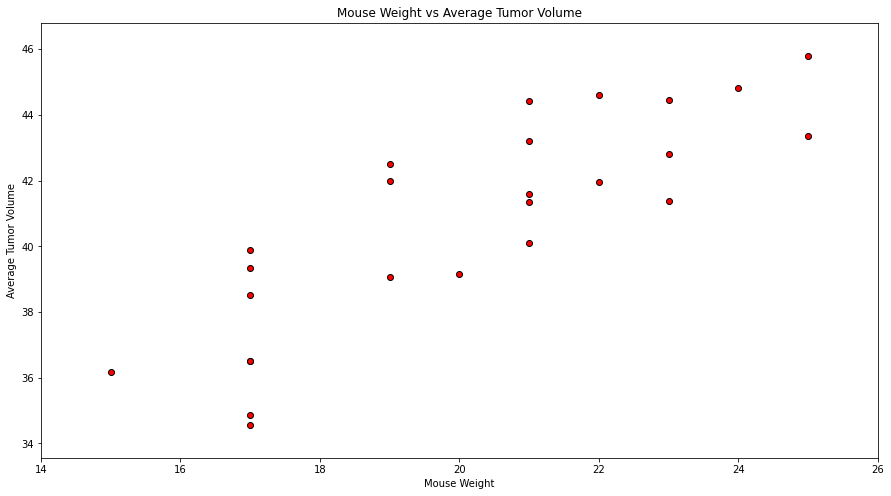

In [64]:
# get all rows for drug "Capomulin"

Filtered_drug_allData = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Capomulin")]
Filtered_drug_allData = Filtered_drug_allData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
Filtered_drug_allData_grouped= Filtered_drug_allData.groupby("Mouse ID")
Mouse_weight_data = Filtered_drug_allData_grouped["Weight (g)"].max()
Avg_Tumor_data = Filtered_drug_allData_grouped["Tumor Volume (mm3)"].mean() 

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(Mouse_weight_data, Avg_Tumor_data, marker="o", facecolors="red", edgecolors="black")

plt.ylim(min(Avg_Tumor_data) - 1,max(Avg_Tumor_data) + 1)
plt.xlim(min(Mouse_weight_data) -1,max(Mouse_weight_data) + 1)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
fig = plt.gcf()
fig.set_size_inches(15,(8))


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


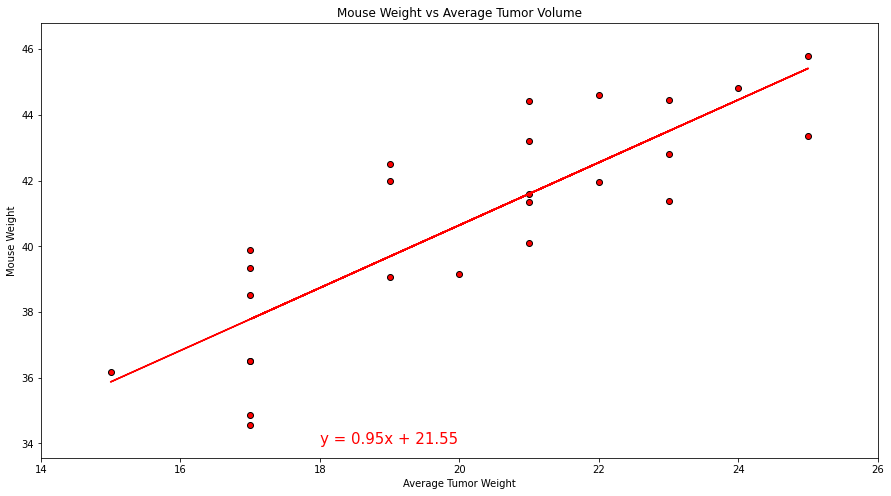

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(Mouse_weight_data,Avg_Tumor_data)[0],2)}")

x_values = Mouse_weight_data
y_values = Avg_Tumor_data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
fig = plt.gcf()
plt.ylim(min(Avg_Tumor_data) - 1,max(Avg_Tumor_data) + 1)
plt.xlim(min(Mouse_weight_data) - 1,max(Mouse_weight_data) + 1)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,34),fontsize=15,color="red")
plt.ylabel('Mouse Weight')
plt.xlabel('Average Tumor Weight')
fig.set_size_inches(15,8)
plt.show()
